# Kaggle Competitions

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import numpy as np

color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
def ignore_warn(*args, **kwargs):
    pass
#warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
os.getcwd()


'E:\\EdsProgramming\\Python\\kagglehouse'

In [69]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [9]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
cols1=df_train.columns.values.tolist()
cols2=df_test.columns.values.tolist()
cols3=cols1+cols2

In [36]:
un=[]
for i in cols3:
    if cols3.count(i)==1:
        un.append(i)
print (df_train.columns)
un

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

['SalePrice']

In [17]:
train_id=train['Id']
test_id=test['Id']

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

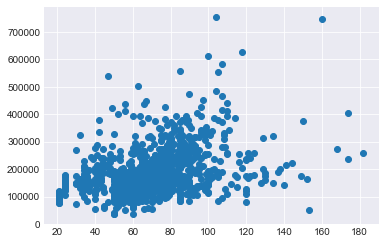

In [70]:
# Remove 2 apparent outliers

fig, ax=plt.subplots()
df_train1 = df_train.drop(df_train[(df_train['LotFrontage']>300) & (df_train['SalePrice']<300000)].index)
ax.scatter(x=df_train1['LotFrontage'],y=df_train1['SalePrice'])
plt.show()

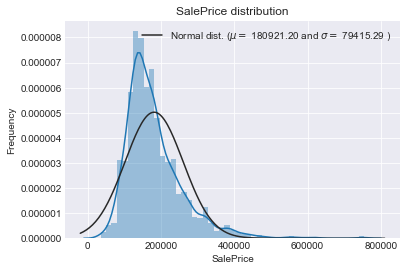

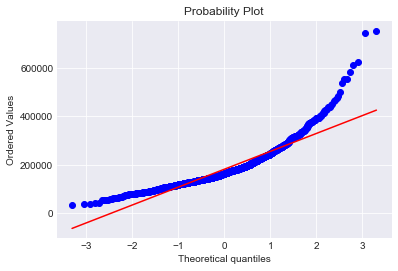

In [71]:
sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



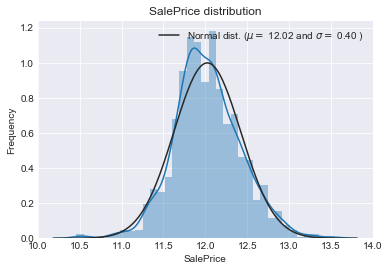

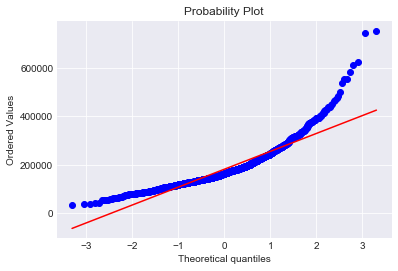

In [73]:
#Transform

df_train1['SalePrice']=np.log1p(df_train['SalePrice'])
sns.distplot(df_train1['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Concatenate
Concatenate and perform column datat ajustment

In [97]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train1.SalePrice.values
all_data = pd.concat((df_train1, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


## Evaluate Missing Data

In [98]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.shape)
missing_data.head(20)

(30, 1)


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5,1,'Percent missing data by feature')

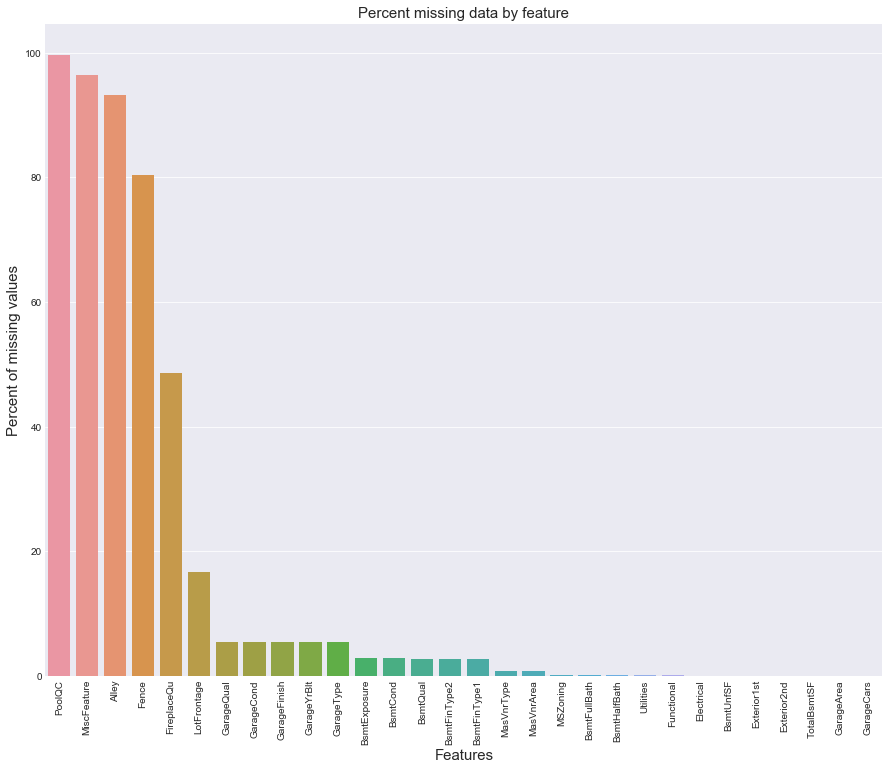

In [78]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

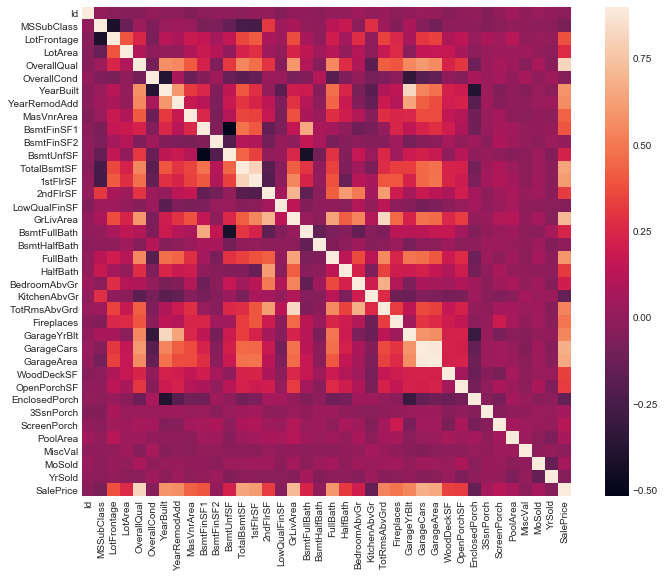

In [80]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Fill Data for nones

In [99]:
cols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish']
bcols=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
gcols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in cols+bcols+gcols:
    all_data[col]=all_data[col].fillna('None')

In [100]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.shape

(20, 1)

In [101]:
missing_data

,Missing Ratio
LotFrontage,16.660953
GarageYrBlt,5.450806
MasVnrType,0.822763
MasVnrArea,0.788481
MSZoning,0.137127
Utilities,0.068564
BsmtFullBath,0.068564
BsmtHalfBath,0.068564
Functional,0.068564
Exterior1st,0.034282


,SalePrice,LogSalePrice
Date,,
2006-01-01,181000.0,12.106258
2006-01-01,136500.0,11.824087
2006-01-01,423000.0,12.955130
2006-01-01,205000.0,12.230770
2006-01-01,260000.0,12.468441


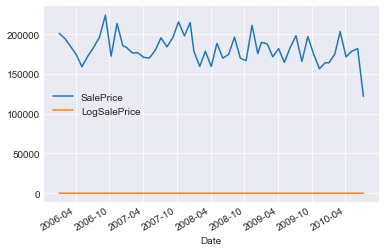

In [173]:
df = df_train[['YrSold','MoSold','SalePrice']]
df=df.astype(str)
df['Date']=pd.to_datetime(df['YrSold']+df['MoSold']+df['MoSold'],format="%Y%m%d")
df.set_index('Date',inplace=True)
df=df.drop(columns=['YrSold','MoSold'])
df=df.sort_index()
df['SalePrice']=df['SalePrice'].astype(float)
df['LogSalePrice']=np.log1p(df['SalePrice'])
df.plot()
filt=df.groupby(df.index).mean()
filt.plot()
df.head()

In [166]:
df['SalePrice']

KeyError: 'SalePrice'

In [105]:
pd.pandas.to_datetime(all_data['YrSold'])

0      1970-01-01 00:00:00.000002008
1      1970-01-01 00:00:00.000002007
2      1970-01-01 00:00:00.000002008
3      1970-01-01 00:00:00.000002006
4      1970-01-01 00:00:00.000002008
5      1970-01-01 00:00:00.000002009
6      1970-01-01 00:00:00.000002007
7      1970-01-01 00:00:00.000002009
8      1970-01-01 00:00:00.000002008
9      1970-01-01 00:00:00.000002008
10     1970-01-01 00:00:00.000002008
11     1970-01-01 00:00:00.000002006
12     1970-01-01 00:00:00.000002008
13     1970-01-01 00:00:00.000002007
14     1970-01-01 00:00:00.000002008
15     1970-01-01 00:00:00.000002007
16     1970-01-01 00:00:00.000002010
17     1970-01-01 00:00:00.000002006
18     1970-01-01 00:00:00.000002008
19     1970-01-01 00:00:00.000002009
20     1970-01-01 00:00:00.000002006
21     1970-01-01 00:00:00.000002007
22     1970-01-01 00:00:00.000002008
23     1970-01-01 00:00:00.000002007
24     1970-01-01 00:00:00.000002010
25     1970-01-01 00:00:00.000002009
26     1970-01-01 00:00:00.000002010
2